Stephanie Rivera

In this notebook I'm working on the pre-processing for my NLP project on studying UN debates about immigration and looking at sentiment trends over time. 

Speeches given at the General Debate form a historical record of the issues that have commanded the attention of the international community. Hidden in this text data are insights about how the dialogue changes over time, and Dynamic Topic Models can help us quantitatively model that evolution.

In [2]:
import pandas as pd

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephanierivera/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
un_debates = pd.read_csv("../UN_Data/un-general-debates.csv")

In [4]:
un_debates.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


In [5]:
len(un_debates)

7507

Create new column that counts the number of times word immigration is used in a debate. But first, let's clean the data up. Using code from: https://towardsdatascience.com/exploring-the-un-general-debates-with-dynamic-topic-models-72dc0e307696

In [53]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer


class SentenceTokenizer(PunktSentenceTokenizer):
    pass


class ParagraphTokenizer(object):
    '''A simple paragraph tokenizer that creates a paragraph break whenever
    the newline character appears between two sentences.'''

    sentence_tokenizer = SentenceTokenizer()

    def span_tokenize(self, text):
        '''Returns a list of paragraph spans.'''
        sentence_spans = list(self.sentence_tokenizer.span_tokenize(text))
        breaks = []
        for i in range(len(sentence_spans) - 1):
            sentence_divider = text[sentence_spans[i][1]: \
                sentence_spans[i+1][0]]
            if '\n' in sentence_divider:
                breaks.append(i)
        paragraph_spans = []
        start = 0
        for break_idx in breaks:
            paragraph_spans.append((start, sentence_spans[break_idx][1]))
            start = sentence_spans[break_idx+1][0]
        paragraph_spans.append((start, sentence_spans[-1][1]))
        return paragraph_spans


class WordTokenizer(RegexpTokenizer):
    '''A word tokenizer that lowercases and lemmatizes words.'''

    lemmatizer = WordNetLemmatizer()
    stopwords = set(stopwords.words('english'))

    def __init__(self, pattern=r'\w+'):
        super().__init__(pattern)

    def tokenize(self, text):
        '''Returns a list of lowercased and lemmatized words.'''

        # Paragraphs often have numbered sections, e.g. "35.\tThe utilization
        # of the United Nations...", so remove that text to prevent these
        # numbers from entering the vocabulary.
        cleaned_text = re.sub(r'^[0-9]+\.', '', text)

        words = super().tokenize(cleaned_text)
        words = [self.lemmatizer.lemmatize(word.lower()) for word in words
                 if word.lower() not in self.stopwords]
        return words

In [33]:
speech = un_debates['text'][1]

In [71]:
x.tokenize('migration')

['migration']

In [36]:
new = ParagraphTokenizer()

x = WordTokenizer()

In [1]:
len(new.span_tokenize)

NameError: name 'new' is not defined

In [55]:
un_debates['text'] = un_debates['text'].apply(x.tokenize)

In [56]:
un_debates.head()

,session,year,country,text
0,44,1989,MDV,"[indeed, pleasure, member, delegation, extend,..."
1,44,1989,FIN,"[may, begin, congratulating, sir, election, pr..."
2,44,1989,NER,"[mr, president, particular, pleasure, behalf, ..."
3,44,1989,URY,"[debate, fortieth, session, general, assembly,..."
4,44,1989,ZWE,"[like, outset, express, delegation, satisfacti..."


In [58]:
type(un_debates['text'][1])

list

In [97]:
key_words = ['immigration','immigrant','immigration','car']

In [66]:
def counter(word,alist):
    count = 0
    for item in alist:
        if (item == word):
            count = count + 1
    return count
    

In [98]:
store = counter('immigration',key_words)
store

2

In [88]:
list_of_counts = []



In [91]:
len(list_of_counts)

7507

In [89]:
for index,row in un_debates.iterrows():
    text_list = row['text']
    store = counter('immigration',text_list)
    list_of_counts.append(store)
    
    

In [92]:
un_debates['counts'] = list_of_counts

In [95]:
un_debates.counts.max()

9

I want to group by year and sum the counts next to see how often the word 'immigration' is used throughout the years in UN debates. 

In [130]:
yearly_count = un_debates.groupby('year')['counts'].sum()
yearly_count = pd.DataFrame(yearly_count)

In [141]:
yearly_count = yearly_count.reset_index()

In [101]:
import matplotlib.pyplot as plt

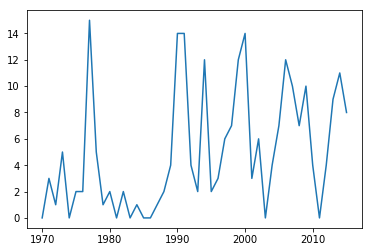

In [102]:
plt.plot(yearly_count)
plt.show()

In [144]:
import plotly
plotly.tools.set_credentials_file(username='StephanieRivera', api_key='Z6dn4l5RceknhnuTFPHt')
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=yearly_count['year'],
            y=yearly_count['counts']
    )]

py.iplot(data, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~StephanieRivera/0 or inside your plot.ly account where it is named 'basic-bar'


In [145]:
yearly_count_country = un_debates.groupby(['year','country'])['counts'].sum()

In [146]:
yearly_count_country = pd.DataFrame(yearly_count_country)
yearly_count_country = yearly_count_country.reset_index()
yearly_count_country

,year,country,counts
0,1970,ALB,0
1,1970,ARG,0
2,1970,AUS,0
3,1970,AUT,0
4,1970,BEL,0
5,1970,BLR,0
6,1970,BOL,0
7,1970,BRA,0
8,1970,CAN,0
9,1970,CMR,0


In [149]:
from ggplot import *

In [181]:
yearly_count_country

,year,country,counts
0,1970,ALB,0
1,1970,ARG,0
2,1970,AUS,0
3,1970,AUT,0
4,1970,BEL,0
5,1970,BLR,0
6,1970,BOL,0
7,1970,BRA,0
8,1970,CAN,0
9,1970,CMR,0


In [204]:
import numpy as np
import matplotlib.pyplot as plt


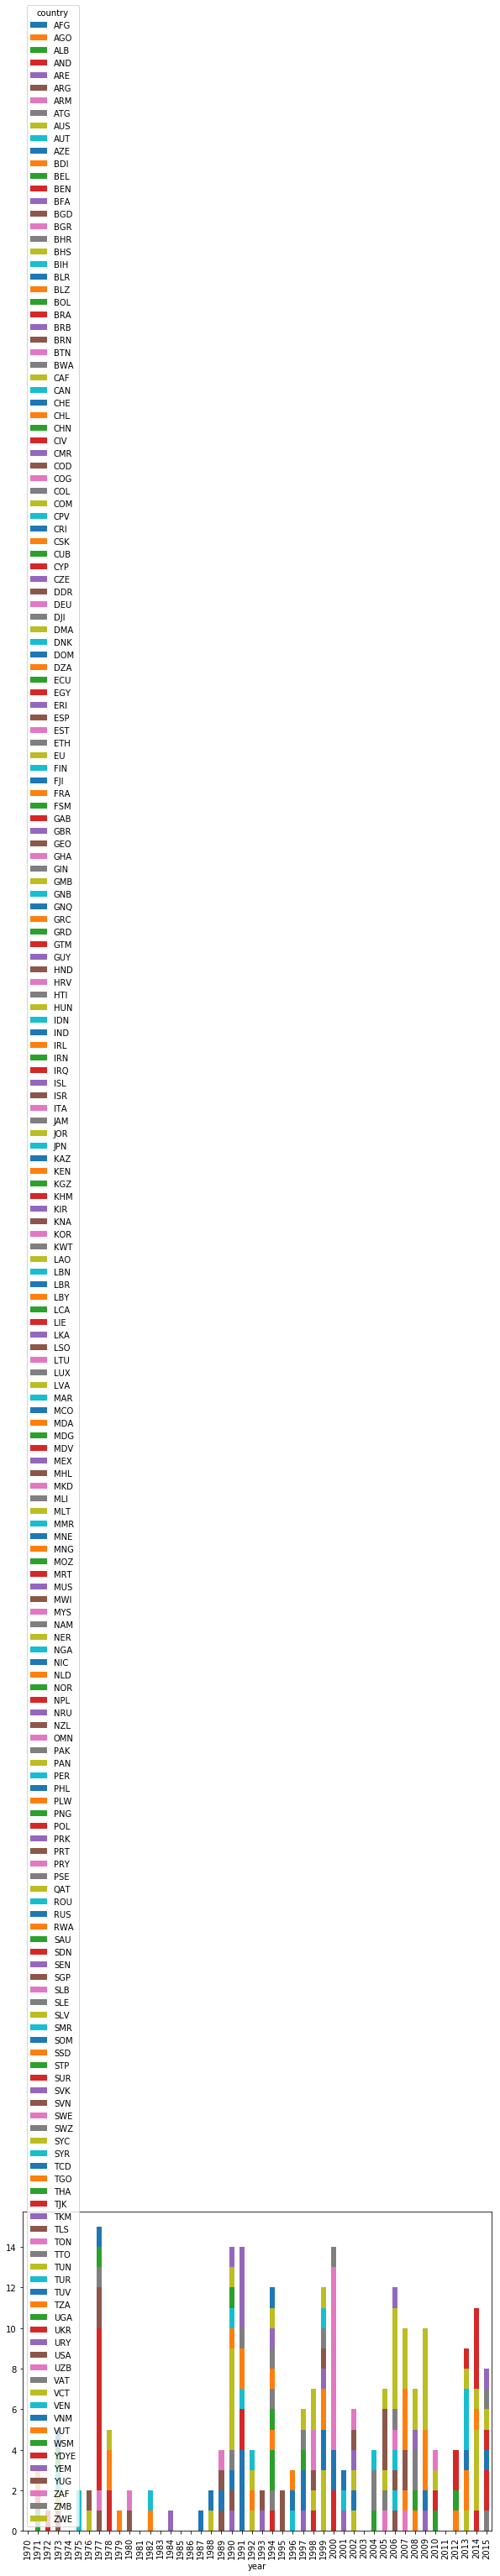

In [211]:
pivot_df = yearly_count_country.pivot(index='year', columns='country', values='counts')
pivot_df.plot.bar(stacked=True, figsize=(10,7))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sort'

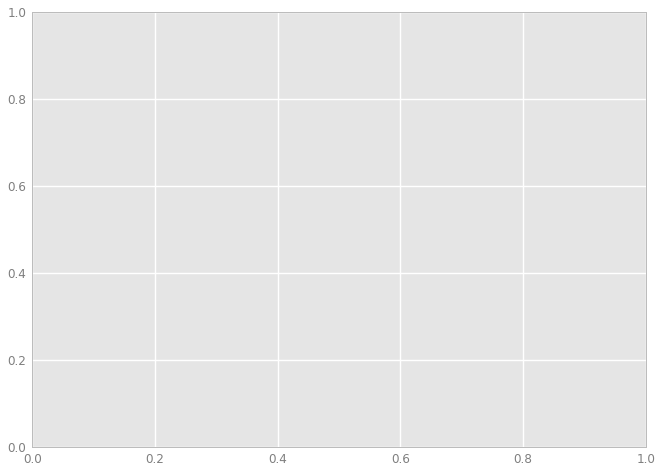

In [199]:
ggplot(yearly_count_country, aes(x = 'year', weight = 'counts',fill="country")) + \
    geom_bar()